# Graph Databases and the Humanities

In [2]:
%matplotlib inline
%load_ext gremlin
import asyncio
import aiogremlin
import networkx as nx

The gremlin extension is already loaded. To reload it, use:
  %reload_ext gremlin


##What's a graph?

A binary mathematical structure consisting of nodes and edges:

$g = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}$



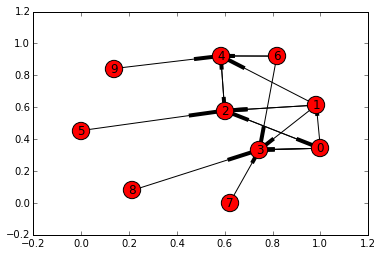

In [8]:
g = nx.scale_free_graph(10)
nx.draw_networkx(g)

## Graphs are everywhere these days!

* Facebook

* Twitter

* LinkedIn

<img src="img/linkedin.jpg" style="width: 800px; float: left;" /><br> 

But **wait**...these graphs are more than ones and zeros...

<img style="float: left" src="http://i.guim.co.uk/static/w-620/h--/q-95/sys-images/Film/Pix/pictures/2009/5/8/1241793515016/Keanu-Reeves-in-Bill-and--001.jpg" />

## Property graph model

<img src="img/property_graph.jpg" style="width: 800px; float: left;" /><br> 

##Why graphs?

Graphs are very good at representing complex interrelations between entities...

<img src="img/flavors.png" style="width: 800px; float: left;" /><br> 

Ahn, Y. Y., Ahnert, S. E., Bagrow, J. P., & Barabási, A. L. (2011). Flavor network and the principles of food pairing. Scientific reports, 1.

<img src="img/cultural.png" style="width: 800px; float: left;" />

Schich, M., Song, C., Ahn, Y. Y., Mirsky, A., Martino, M., Barabási, A. L., & Helbing, D. (2014). A network framework of cultural history. Science, 345(6196), 558-562.

## The CulturePlex Lab: Our research

* The production and diffusion of cultural objects.

###Towards a Digital Geography of Hispanic Baroque Art

<img src="img/dig_geo.png" style="width: 800px; float: left;" />

### The Art Space of a Global Community

<img src="img/global.png" style="width: 800px; float: left;" />

### Why GraphDBs?

* Relational databases:

  - Inflexible
  - Bad at relationships
  - Lacking in semantic richness
  
#### Neo4j

<img src="img/neo4jlogo.png" style="width: 800px; float: left;" />


* Neo4jrestclient by versae - 58977 downloads

* SylvaDB

### SylvaDB

<img src="img/sylva.png" style="width: 800px; float: left;" />

* Landscapes of Castas Painting - Masters Thesis/DH2014
* Preliminaries Project - DH2013/Congress 2015

**Interested in SylvaDB? Check out Javier de la Rosa's talk tomorrow at 11:00 in Colonel By E015**

**Interested in the Preliminaries Project? Check out my talk on Wednesday at 1:15 in Colonel By C03**

### projx

* Preliminaries Projections required a wide variety of schema transformations and projections.

* A tedious task to be sure.

* Enter projx - a graph transformation library written in Python with a Cypher based DSL

```python
subgraph = projection.execute("""
    MATCH   (p1:Person)-(wild)-(p2:Person)
    PROJECT (p1)-(p2)
    METHOD NEWMAN Institution, City
    SET     label = wild.label
    DELETE  wild
""")
```

### aiogremlin

#### Tinkerpop/Gremlin Ecosystem

* A standard API for graph databases

* Gremlin traversal language

* Tinkerpop enabled backends:

  - Titan
  - Neo4j
  - Gremlin-Elastic
  - Hadoop (Spark/Giraph)
  
* All accessed using the Gremlin Server

<img style="float:left; width: 500px" src="img/gremlin-server.png">

In [9]:
@asyncio.coroutine
def stream(gc):
    results = []
    resp = yield from gc.submit("x + x", bindings={"x": 1})
    while True:
        result = yield from resp.stream.read()
        if result is None:
            break
        results.append(result)
    return results
loop = asyncio.get_event_loop()
gc = aiogremlin.GremlinClient()
results = loop.run_until_complete(stream(gc))

In [10]:
results

[Message(status_code=200, data=[2], message={}, metadata='')]

In [11]:
loop.run_until_complete(gc.close())  # Explicitly close client!!!

###ipython-gremlin

In [12]:
%%gremlin

graph = TinkerFactory.createModern()
g = graph.traversal(standard())
g.V().has('name','marko').out('knows').values('name')

['vadas', 'josh']

### 10 Million Spanish Books

Identify statistical regularities in the production and diffusion of Spanish literature.

* 13,188,245 records from OCLC

* Neo4j/Tinkerpop/Apache Spark

**Interested? Check out my talk on Wednesday at 11:00 in Louis-Pasteur 155**

### Conclusion: Graphs are cool!

<img style="float: left" src="img/gremlin-without-a-cause.png" />